# Analytics - Product Quality

#### Date: 2020/02

#### SUMMARY:

- This notebook represents the project quality analysis of the date exposed right above. 

### TEAM:

##### Semester: YYYY/0X
##### Professor: Hilmer Neri

##### Members:

- Member x
- Member y

### LIBRARIES

In [201]:
# Deal with data
import pandas as pd
import json
from glob import glob
import os
import re

# Deal with visualization
import matplotlib.pyplot as plt

# Deal with time
import datetime

### GRAPH SETTINGS

In [202]:
fig = plt.figure(figsize=(20, 10))

<Figure size 1440x720 with 0 Axes>

### DATAFRAME SETTINGS

In [203]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

#### Replace your semester, project name, repository name, and the programming language extension

In [204]:
language = [['fga-eps-mds-2022-1-PUMA-Frontend', 'js'],
            ['fga-eps-mds-2022-1-PUMA-AlocateService', 'js'],
            ['fga-eps-mds-2022-1-PUMA-ApiGateway', 'js'],
            ['fga-eps-mds-2022-1-PUMA-NotifyService', 'js'],
            ['fga-eps-mds-2022-1-PUMA-ProjectService', 'js'],
            ['fga-eps-mds-2022-1-PUMA-UserService', 'js']]

repos_language = {}

for item in language:
    repos_language[f"{item[0]}"] = item[1]

### SonarCloud

##### Path to the folder with all your jsons

In [205]:
jsons = glob('analytics-raw-data/*.json')
print(jsons) # add your path here

['analytics-raw-data/fga-eps-mds-2022-1-PUMA-Frontend-09-05-2022-19-53-44-v3.1.4.json', 'analytics-raw-data/fga-eps-mds-2022-1-PUMA-Frontend-09-14-2022-19-39-32-v3.1.5.json', 'analytics-raw-data/fga-eps-mds-2022-1-PUMA-Frontend-09-08-2022-01-52-40-v3.1.4.json', 'analytics-raw-data/fga-eps-mds-2022-1-PUMA-Frontend-09-12-2022-19-56-39-v3.1.5.json', 'analytics-raw-data/fga-eps-mds-2022-1-PUMA-Frontend-09-09-2022-01-58-28-v3.1.5.json', 'analytics-raw-data/fga-eps-mds-2022-1-PUMA-UserService-08-01-2022-01-16-28-v3.1.1.json', 'analytics-raw-data/fga-eps-mds-2022-1-PUMA-AlocateService-08-01-2022-01-21-20-v3.1.1.json', 'analytics-raw-data/fga-eps-mds-2022-1-PUMA-ApiGateway-09-07-2022-21-52-15-v3.1.1.json', 'analytics-raw-data/fga-eps-mds-2022-1-PUMA-Frontend-09-14-2022-18-04-46-v3.1.5.json', 'analytics-raw-data/fga-eps-mds-2022-1-PUMA-Frontend-09-18-2022-19-03-23-v3.1.6.json', 'analytics-raw-data/fga-eps-mds-2022-1-PUMA-Frontend-08-22-2022-19-47-28-v3.1.2.json', 'analytics-raw-data/fga-eps-mds

In [206]:
def read_json(json_path):
    
    with open(json_path) as json_file:
        json_obj = json.load(json_file)
        
    return json_obj

def create_base_component_df(json_list):
    
    df = pd.DataFrame()

    print(len(json_list))
    for i in json_list:
        base_component = read_json(i)

        base_component_data = base_component['baseComponent']['measures']

        base_component_df = pd.DataFrame(base_component_data)

        base_component_df['filename'] = os.path.basename(i)

        df = df.append(base_component_df, ignore_index=True)

        print(i, df)
        
    # Replace the UnB semester with yours.
    aux_df = df['filename'].str.split(r"fga-eps-mds-2022.1-(.*?)-(.*?)-(.*?)-(.*?)-v(.*?).json", expand=True)

    print(aux_df)

    df['repository'] = aux_df[2]

    print('7')

    df['version'] = aux_df[5]

    print('8')

    df = df.sort_values(by=['repository', 'version'])
        
    return df

#### Create base component dataframe

In [207]:
base_component_df = create_base_component_df(jsons)

32
analytics-raw-data/fga-eps-mds-2022-1-PUMA-Frontend-09-05-2022-19-53-44-v3.1.4.json                      metric value bestValue  \
0  duplicated_lines_density   2.0     False   
1                 functions   419       NaN   
2           security_rating   1.0      True   
3                     files   102       NaN   
4                complexity   610       NaN   
5                     ncloc  5579       NaN   
6                  coverage   0.0     False   
7     comment_lines_density   1.2     False   

                                            filename  
0  fga-eps-mds-2022-1-PUMA-Frontend-09-05-2022-19...  
1  fga-eps-mds-2022-1-PUMA-Frontend-09-05-2022-19...  
2  fga-eps-mds-2022-1-PUMA-Frontend-09-05-2022-19...  
3  fga-eps-mds-2022-1-PUMA-Frontend-09-05-2022-19...  
4  fga-eps-mds-2022-1-PUMA-Frontend-09-05-2022-19...  
5  fga-eps-mds-2022-1-PUMA-Frontend-09-05-2022-19...  
6  fga-eps-mds-2022-1-PUMA-Frontend-09-05-2022-19...  
7  fga-eps-mds-2022-1-PUMA-Frontend-09-05-2022-19

<ipython-input-206-e7698890bc17>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
<ipython-input-206-e7698890bc17>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
<ipython-input-206-e7698890bc17>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
<ipython-input-206-e7698890bc17>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
<ipython-input-206-e7698890bc17>:22: FutureWarning: The frame.append method is deprecated and will b

analytics-raw-data/fga-eps-mds-2022-1-PUMA-ApiGateway-08-01-2022-01-11-16-v3.1.1.json                        metric value bestValue  \
0    duplicated_lines_density   2.0     False   
1                   functions   419       NaN   
2             security_rating   1.0      True   
3                       files   102       NaN   
4                  complexity   610       NaN   
5                       ncloc  5579       NaN   
6                    coverage   0.0     False   
7       comment_lines_density   1.2     False   
8    duplicated_lines_density   2.1     False   
9                   functions   416       NaN   
10            security_rating   1.0      True   
11                      files   143       NaN   
12                 complexity   602       NaN   
13                      ncloc  6964       NaN   
14                   coverage   0.0     False   
15      comment_lines_density   0.7     False   
16   duplicated_lines_density   2.0     False   
17                  functions   

<ipython-input-206-e7698890bc17>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
<ipython-input-206-e7698890bc17>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
<ipython-input-206-e7698890bc17>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
<ipython-input-206-e7698890bc17>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
<ipython-input-206-e7698890bc17>:22: FutureWarning: The frame.append method is deprecated and will b

                       metric value bestValue  \
0    duplicated_lines_density   2.0     False   
1                   functions   419       NaN   
2             security_rating   1.0      True   
3                       files   102       NaN   
4                  complexity   610       NaN   
5                       ncloc  5579       NaN   
6                    coverage   0.0     False   
7       comment_lines_density   1.2     False   
8    duplicated_lines_density   2.1     False   
9                   functions   416       NaN   
10            security_rating   1.0      True   
11                      files   143       NaN   
12                 complexity   602       NaN   
13                      ncloc  6964       NaN   
14                   coverage   0.0     False   
15      comment_lines_density   0.7     False   
16   duplicated_lines_density   2.0     False   
17                  functions   419       NaN   
18            security_rating   1.0      True   
19                  

<ipython-input-206-e7698890bc17>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)
<ipython-input-206-e7698890bc17>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(base_component_df, ignore_index=True)


In [208]:
base_component_df.head(10)

,metric,value,bestValue,filename,repository,version
47,duplicated_lines_density,0.0,True,fga-eps-mds-2022-1-PUMA-AlocateService-08-01-2...,AlocateService,3.1.1
48,functions,5,NaN,fga-eps-mds-2022-1-PUMA-AlocateService-08-01-2...,AlocateService,3.1.1
49,security_rating,1.0,True,fga-eps-mds-2022-1-PUMA-AlocateService-08-01-2...,AlocateService,3.1.1
50,files,5,NaN,fga-eps-mds-2022-1-PUMA-AlocateService-08-01-2...,AlocateService,3.1.1
51,complexity,12,NaN,fga-eps-mds-2022-1-PUMA-AlocateService-08-01-2...,AlocateService,3.1.1
52,ncloc,287,NaN,fga-eps-mds-2022-1-PUMA-AlocateService-08-01-2...,AlocateService,3.1.1
53,comment_lines_density,0.0,False,fga-eps-mds-2022-1-PUMA-AlocateService-08-01-2...,AlocateService,3.1.1
84,duplicated_lines_density,0.0,True,fga-eps-mds-2022-1-PUMA-AlocateService-09-07-2...,AlocateService,3.1.1
85,functions,5,NaN,fga-eps-mds-2022-1-PUMA-AlocateService-09-07-2...,AlocateService,3.1.1
86,security_rating,1.0,True,fga-eps-mds-2022-1-PUMA-AlocateService-09-07-2...,AlocateService,3.1.1


#### Create dataframe per file

In [209]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'tests',
               'test_errors',
               'test_failures',
               'test_execution_time',
               'security_rating']

len(metric_list)

12

In [210]:
def get_files_df(df):
    
    files = df[df['qualifier'] == 'FIL'] 
    
    files = files.dropna(subset=['functions', 'complexity','comment_lines_density', 'duplicated_lines_density', 'coverage' ])
    
    return files

In [211]:
def get_dir_df(df):
    dirs = df[df["qualifier"] == "DIR"]     

    newdf = pd.to_numeric(dirs["tests"])
    
    max_value_index = newdf.idxmax()            
    
    return dirs.loc[max_value_index]

In [212]:
def get_uts_df(df):
    dirs = df[df['qualifier'] == 'UTS']     

    dirs = dirs.dropna(subset=['test_execution_time'])          
    
    return dirs

In [213]:
def metric_per_file(json):
    
    file_json = []
    
    for component in json['components']:
        
        ncloc_value = 0;
        
        for valores in component['measures']:

            if valores['metric'] == 'ncloc':
                ncloc_value = float(valores['value'])
                break
    
        if (component['qualifier'] == 'FIL') & (ncloc_value > 0) or (component['qualifier'] == 'DIR') or (component['qualifier'] == 'UTS'):                       
            file_json.append(component)

    return file_json

def generate_file_dataframe_per_release(metric_list, json, language_extension):
    
    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)
    df2 = pd.DataFrame(columns = df_columns)
    df3 = pd.DataFrame(columns = df_columns)
    
    
    for file in json:
        try:
                if file['qualifier'] == 'FIL' and file['language'] == language_extension:
                    for measure in file['measures']:
                        df.at[file['path'], measure['metric']] = measure['value']

                    df['qualifier'] = file['qualifier'] 

                elif file['qualifier'] == 'UTS':  
                    for measure in file['measures']:
                        df3.at[file['path'], measure['metric']] = measure['value']

                    df3['qualifier'] = file['qualifier'] 
                elif file['qualifier'] == 'DIR':
                    for measure in file['measures']:
                        df2.at[file['path'], measure['metric']] = measure['value']
                    df2['qualifier'] = file['qualifier'] 
        except:
            pass

    df.reset_index(inplace = True)
    df2.reset_index(inplace = True)
    df3.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)
    df2 = df2.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)
    df3 = df3.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    dfFinal = pd.concat([df,df2,df3], axis=0)

    return dfFinal

def create_file_df(json_list):
    
    df = pd.DataFrame()
    dfDir = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)
        
        file_component_data = metric_per_file(file_component)
                        
        file_name = os.path.basename(i)

        file_repository = re.split(r'-(\d+-\d+-\d+-\d+-\d+-\d+)-v(.*?).json', file_name)[0]

        file_language = repos_language[f"{file_repository}"]

        file_component_df = generate_file_dataframe_per_release(metric_list, file_component_data, language_extension = file_language)
        
        file_component_df['filename'] = os.path.basename(i)

        df = df.append(file_component_df, ignore_index=True)
        
    # Replace the UnB semester with yours.
    
    aux_df = df['filename'].str.split(r"-(\d+-\d+-\d+-\d+-\d+-\d+)-v(.*?).json", expand=True)

    df['repository'] = aux_df[0]

    df['version'] = aux_df[2]

    df = df.sort_values(by=['version'])
    
    return df

In [214]:
file_component_df = create_file_df(jsons)
file_component_df.repository.unique()

<ipython-input-213-ce0dcd135ac6>:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_component_df, ignore_index=True)
<ipython-input-213-ce0dcd135ac6>:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_component_df, ignore_index=True)
<ipython-input-213-ce0dcd135ac6>:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_component_df, ignore_index=True)
<ipython-input-213-ce0dcd135ac6>:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(file_component_df, ignore_index=True)
<ipython-input-213-ce0dcd135ac6>:80: FutureWarning: The frame.append method is deprecated and will b

array(['fga-eps-mds-2022-1-PUMA-UserService',
       'fga-eps-mds-2022-1-PUMA-AlocateService',
       'fga-eps-mds-2022-1-PUMA-Frontend',
       'fga-eps-mds-2022-1-PUMA-ApiGateway',
       'fga-eps-mds-2022-1-PUMA-NotifyService',
       'fga-eps-mds-2022-1-PUMA-ProjectService'], dtype=object)

#### Removing NaN

In [215]:
# file_component_df = file_component_df.dropna(subset=['functions', 'complexity','comment_lines_density', 'duplicated_lines_density', 'coverage' ])

        #### Create dataframe per repository

In [216]:
# Example. You must replace repo1, repo1,..., for your repository's names

repo1_df = file_component_df[file_component_df['repository'] == 'repo1']
repo2_df = file_component_df[file_component_df['repository'] == 'repo2']
...

Ellipsis

In [217]:
def _ncloc(df):
    ncloc = 0
    for each in df['ncloc']:
        n = 0
        # try to cast the current ncloc value to int, if the value is NaN/Null, consider it as zero.
        try:
            n = int(each)
        except ValueError:
            n = 0
        ncloc += n

    return ncloc

### Measure calculations according Q-Rapids quality model

# Quality Aspect - Maintainability
## Factor - Code Quality

##### COMPLEXITY

In [218]:
def m1(df):

    files_df = get_files_df(df)
    
    density_non_complex_files = len(files_df[(files_df['complexity'].astype(float) /
                                              files_df['functions'].astype(float)) < 10]) / len(files_df)
    
    return density_non_complex_files

##### COMMENTS

In [219]:
def m2(df):

    files_df = get_files_df(df)
    
    density_comment_files = len(files_df[(files_df['comment_lines_density'].astype(float) > 10) &
                                         (files_df['comment_lines_density'].astype(float) < 30)]) / len(files_df)
    
    return density_comment_files

##### DUPLICATIONS

In [220]:
def m3(df):

    files_df = get_files_df(df)
    
    duplication = len(files_df[(files_df['duplicated_lines_density'].astype(float) < 5)])/len(files_df)
    
    return duplication

# Quality Aspect - Reliability
## Factor - Testing Status

##### Passed tests

In [221]:
def m4(df):

    dir_df = get_dir_df(df)

    passed_tests = (float(dir_df['tests']) - (float(dir_df['test_errors']) + float(dir_df['test_failures']))) /\
                   float(dir_df['tests'])

    return passed_tests

##### Fast test builds

In [222]:
def m5(df):

    dir_df = get_uts_df(df)
    
    density_fast_test_builds = len(dir_df[(dir_df['test_execution_time'].astype(float)) < 300000]) /\
                               len(dir_df['test_execution_time'].astype(float))
    return density_fast_test_builds

##### Test coverage

In [223]:
def m6(df):

    files_df = get_files_df(df)

    density_test_coverage = len(files_df[(files_df['coverage'].astype(float) > 60)]) / len(files_df)

    return density_test_coverage

### Calculate m1, m2, m3, m4, m5 and m6 for each repository

In [224]:
def create_metrics_df(df):
    
    version_vec = df['version'].unique()
    
    m1_list = []
    m2_list = []
    m3_list = []
    m4_list = []
    m5_list = []
    m6_list = []

    ncloc_list = []
    repository_list = []
    version_list = []
    
    for version in version_vec:

        version_df = df[df['version'] == version]

        m1_list.append(m1(version_df))
        m2_list.append(m2(version_df))
        m3_list.append(m3(version_df))
        m4_list.append(m4(version_df))
        m5_list.append(m5(version_df))
        m6_list.append(m6(version_df))

        ncloc_list.append(_ncloc(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)
        
    metrics_df = pd.DataFrame({'m1': m1_list,
                               'm2': m2_list,
                               'm3': m3_list,
                               'm4': m4_list,
                               'm5': m5_list,
                               'm6': m6_list,
                               'repository': repository_list, 
                               'version': version_list,
                               'ncloc': ncloc_list})
        
    return metrics_df

In [225]:
repo1 = create_metrics_df(repo1_df)
repo2 = create_metrics_df(repo2_df)
...

Ellipsis

### Data visualization

- You must do this for each of your repositories

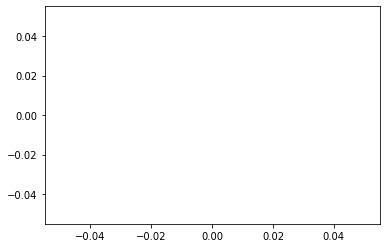

In [226]:
plt.plot(repo1['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repo1['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repo1['m3'], linewidth=3, marker='o', markersize=10)
plt.plot(repo1['m4'], linewidth=3, marker='o', markersize=10)
plt.plot(repo1['m5'], linewidth=3, marker='o', markersize=10)
plt.plot(repo1['m6'], linewidth=3, marker='o', markersize=10)

Ellipsis

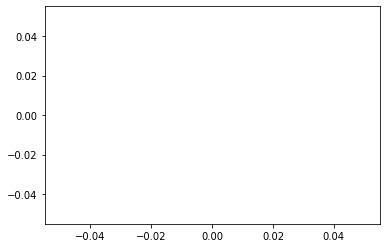

In [227]:

plt.plot(repo2['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repo2['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repo2['m3'], linewidth=3, marker='o', markersize=10)
plt.plot(repo2['m4'], linewidth=3, marker='o', markersize=10)
plt.plot(repo2['m5'], linewidth=3, marker='o', markersize=10)
plt.plot(repo2['m6'], linewidth=3, marker='o', markersize=10)

...

### Quality factor and aspect aggregation

- You must do this for each of your repositories

In [228]:
psc1 = 1
psc2 = 1
pc1 = 0.5
pc2 = 0.5
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33
pm4 = 0.25
pm5 = 0.25
pm6 = 0.5

repo1['code_quality'] = ((repo1['m1']*pm1) + (repo1['m2']*pm2) + (repo1['m3']*pm3)) * psc1
repo2['code_quality'] = ((repo2['m1']*pm1) + (repo2['m2']*pm2) + (repo2['m3']*pm3)) * psc1
...

repo1['testing_status'] = ((repo1['m4']*pm4) + (repo1['m5']*pm5) + (repo1['m6']*pm6)) * psc2
repo2['testing_status'] = ((repo2['m4']*pm4) + (repo2['m5']*pm5) + (repo2['m6']*pm6)) * psc2
...

Ellipsis

Ellipsis

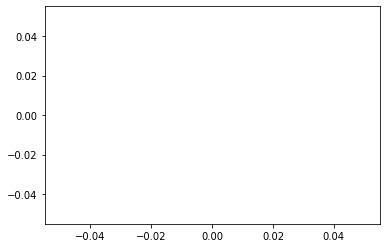

In [229]:
plt.plot(repo1['code_quality'], linewidth=3, marker='o', markersize=5)
plt.plot(repo2['code_quality'], linewidth=3, marker='o', markersize=5)
...

Ellipsis

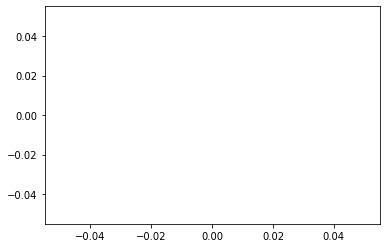

In [230]:

plt.plot(repo1['testing_status'], linewidth=3, marker='o', markersize=5)
plt.plot(repo2['testing_status'], linewidth=3, marker='o', markersize=5)
...


In [231]:
repo1['Maintainability'] = repo1['code_quality'] * pc1
repo1['Reliability'] = repo1['testing_status'] * pc2
repo1['total'] = repo1['Maintainability'] + repo1['Reliability']

repo2['Maintainability'] = repo2['code_quality'] * pc1
repo2['Reliability'] = repo2['testing_status'] * pc2
repo2['total'] = repo2['Maintainability'] + repo2['Reliability']
...

Ellipsis

In [232]:
repo1

,m1,m2,m3,m4,m5,m6,repository,version,ncloc,code_quality,testing_status,Maintainability,Reliability,total


(0.1, 1.1)

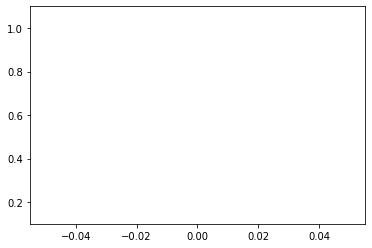

In [233]:
plt.plot(repo1['Maintainability'], linewidth=3, marker='o', markersize=5)
plt.plot(repo1['Reliability'], linewidth=3, marker='*', markersize=5)
plt.plot(repo1['total'], linewidth=3, marker='X', markersize=5)

plt.ylim(0.1,1.1)

In [234]:
repo2

,m1,m2,m3,m4,m5,m6,repository,version,ncloc,code_quality,testing_status,Maintainability,Reliability,total


Ellipsis

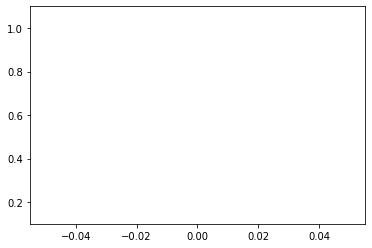

In [235]:
plt.plot(repo2['Maintainability'], linewidth=3, marker='o', markersize=5)
plt.plot(repo2['Reliability'], linewidth=3, marker='*', markersize=5)
plt.plot(repo2['total'], linewidth=3, marker='X', markersize=5)

plt.ylim(0.1,1.1)
...

### You must do the total plot and the statics analysis for the repository with more versions.

In [236]:
# Building descriptive statistics dataframe. You must replace YourRepoName for your repository name with more product versions.
print('oi', [repo1, repo2, ...])
metrics_df = pd.concat([repo1, repo2, ...], ignore_index=True)
print(metrics_df)

more_versions_repo = metrics_df[metrics_df['repository'] == 'YourRepoName']

def get_characteristc_stats(repo_series):
    return {
        'mean': repo_series.mean(),
        'mode': repo_series.mode(),
        'median': repo_series.median(),
        'std': repo_series.std(),
        'var': repo_series.var(),
        'min': repo_series.min(),
        'max': repo_series.max()
    }

maintainability_stats = pd.DataFrame(get_characteristc_stats(more_versions_repo["Maintainability"]),
                                     columns=['mean', 'mode', 'median', 'std', 'var', 'min', 'max'])

reliability_stats = pd.DataFrame(get_characteristc_stats(more_versions_repo["Reliability"]),
                                 columns=['mean', 'mode', 'median', 'std', 'var', 'min', 'max'])

oi [Empty DataFrame
Columns: [m1, m2, m3, m4, m5, m6, repository, version, ncloc, code_quality, testing_status, Maintainability, Reliability, total]
Index: [], Empty DataFrame
Columns: [m1, m2, m3, m4, m5, m6, repository, version, ncloc, code_quality, testing_status, Maintainability, Reliability, total]
Index: [], Ellipsis]


TypeError: cannot concatenate object of type '<class 'ellipsis'>'; only Series and DataFrame objs are valid

In [ ]:
print(maintainability_stats)

NameError: name 'maintainability_stats' is not defined

In [ ]:
print(reliability_stats)

NameError: name 'reliability_stats' is not defined

### Plotting the aggregated quality characteristic indicator

In [ ]:
plt.figure(figsize=(20, 10))

# boxplot
plt.boxplot([more_versions_repo['Maintainability'], more_versions_repo['Reliability']],
labels=['Maintainability', 'Reliability'])

NameError: name 'more_versions_repo' is not defined

<Figure size 1440x720 with 0 Axes>

### Plotting the aggregated repository quality indicator

In [ ]:
plt.plot(more_versions_repo['total'], linewidth=3, marker='o', markersize=5)

plt.ylim(.1,1)

NameError: name 'more_versions_repo' is not defined

In [ ]:
# DATE FORMAT: MM-DD-YYYY-HH:MM:SS
currentDateTime = datetime.datetime.now().strftime("%m-%d-%Y-%H:%M:%S")

metrics_df.to_excel('data/fga-eps-mds-2022-1-PUMA-Doc-{}.xlsx'.format(currentDateTime), index = False)

metrics_df.to_csv('data/fga-eps-mds-2022-1-PUMA-Doc-{}.csv'.format(currentDateTime), index = False)

NameError: name 'metrics_df' is not defined